# Data curation

After the translation of the dataset it was discovered that the data was not ready to be further processed. Since the original values were retrieved through an online survey, many answers contain mistakes or were not entered in a proper state or type.

The scope of this notebook is to curate any received data without major modifications or deletions.

## Load data

In [1]:
import os
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_rows', None)

In [2]:
input_file_path = 'data/data_translated.csv'
data_translated = pd.read_csv(input_file_path)

data_translated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   TimeStamp             585 non-null    object
 1   YearsExperience       585 non-null    object
 2   DevelopmentType       585 non-null    object
 3   ProgrammingLanguages  585 non-null    object
 4   CompanySize           585 non-null    object
 5   WorkLocation          585 non-null    object
 6   SuperivisionRole      585 non-null    object
 7   WorkOutsideMainJob    578 non-null    object
 8   CityLive              585 non-null    object
 9   CityWork              288 non-null    object
 10  Sex                   575 non-null    object
 11  NetSalary             585 non-null    object
dtypes: object(12)
memory usage: 55.0+ KB


## `NetSalary` column

The first step is to curate the `NetSalary` column as it contains non numeric values. This column will be the dependent variable in our model creation process.

In [3]:
data_translated.NetSalary.str.isnumeric().all()

False

A simple helper function is defined that returns the non numeric net salary values.

In [4]:
def non_numeric_salary():
    return pd.to_numeric(data_translated.NetSalary, errors='coerce').isna()

The following non numeric values were found.

In [5]:
data_translated.loc[non_numeric_salary(), ['YearsExperience', 'CityLive', 'CityWork', 'NetSalary']]

,YearsExperience,CityLive,CityWork,NetSalary
9,1-3,Heraklion,Stuttgart,"15,360 for part-time work as a working student (2nd year)"
17,4-5,Thessaloniki,Dublin/California,~43.000
23,1-3,Athena,Berlin,40K
55,1-3,Thessaloniki,Thessaloniki,850€ * 14 = 11.900€
58,6-10,Athena,Athena,"14,700"
59,6-10,Athena,San Francisco,~100.000
66,4-5,Serres,Drama,"11,800"
124,1-3,Heraklion,Heraklion,700 € per month
141,6-10,Oxford,Oxford,70000 in approx
160,1-3,Thessaloniki,Thessaloniki,12.18€


The Greek decimal separator (comma) is replaced with the US separator (period).

In [6]:
data_translated['NetSalary'] = data_translated['NetSalary'].str.replace(',','.')

data_translated.loc[non_numeric_salary(), ['YearsExperience', 'CityLive', 'CityWork', 'NetSalary']]

,YearsExperience,CityLive,CityWork,NetSalary
9,1-3,Heraklion,Stuttgart,15.360 for part-time work as a working student (2nd year)
17,4-5,Thessaloniki,Dublin/California,~43.000
23,1-3,Athena,Berlin,40K
55,1-3,Thessaloniki,Thessaloniki,850€ * 14 = 11.900€
59,6-10,Athena,San Francisco,~100.000
124,1-3,Heraklion,Heraklion,700 € per month
141,6-10,Oxford,Oxford,70000 in approx
160,1-3,Thessaloniki,Thessaloniki,12.18€
183,1-3,Athena,Athena,750 net x 12 + (750 + 375 gifts) = 10.125 (without bonus)
237,1-3,Patras,Patras,11.20€


The remaining data is curated manually. Any comments or textual hints added by the user into the input field are taken into acount. Rows 14 and 21 are dropped since the `NetSalary` value could not be explained.

In [7]:
data_translated = data_translated.drop([14, 21])

data_translated.loc[9, 'NetSalary'] = '30720'
data_translated.loc[17, 'NetSalary'] = '43000'
data_translated.loc[23, 'NetSalary'] = '40000'
data_translated.loc[55, 'NetSalary'] = '11900'
data_translated.loc[59, 'NetSalary'] = '100000'
data_translated.loc[124, 'NetSalary'] = '700'
data_translated.loc[141, 'NetSalary'] = '70000'
data_translated.loc[160, 'NetSalary'] = '12.18'
data_translated.loc[183, 'NetSalary'] = '10125'
data_translated.loc[237, 'NetSalary'] = '11.2'
data_translated.loc[254, 'NetSalary'] = '7800'
data_translated.loc[343, 'NetSalary'] = '15050'
data_translated.loc[357, 'NetSalary'] = '30.00'
data_translated.loc[367, 'NetSalary'] = '10500'
data_translated.loc[555, 'NetSalary'] = '27408'
data_translated.loc[558, 'NetSalary'] = '43450'
data_translated.loc[562, 'NetSalary'] = '26600'

The `NetSalary` column is converted to float type.

In [8]:
data_translated.NetSalary = data_translated.NetSalary.astype(float)

The `NetSalary` column values are plotted into a histogram so we can check the distribution and any outliers.

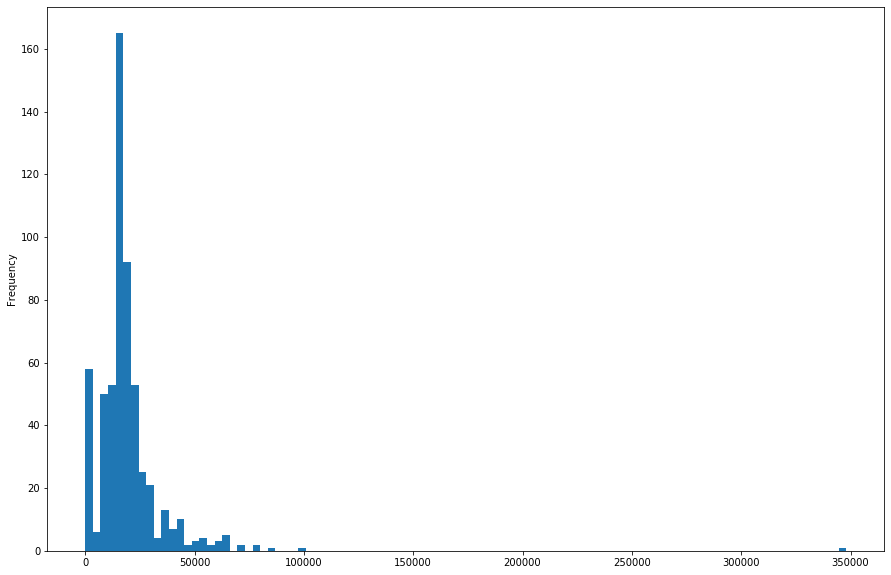

In [9]:
data_translated.NetSalary.plot.hist(figsize=(15,10), bins=100)

One outlier was found at the right end of the histogram. After evaluating the case, it was decided to curate the value assuming an extra zero was added accidentally but the user.

In [10]:
data_translated[data_translated['NetSalary'] > 150000]

,TimeStamp,YearsExperience,DevelopmentType,ProgrammingLanguages,CompanySize,WorkLocation,SuperivisionRole,WorkOutsideMainJob,CityLive,CityWork,Sex,NetSalary
47,7/15/2020 16:02:01,4-5,AI / ML,"C, C++, C#, Python, Visual Basic .NET, PHP, R",101-200,Both,Yes,Yes,Patras,Patras,Man,348000.0


In [11]:
data_translated.loc[47, 'NetSalary'] = data_translated.loc[47, 'NetSalary'] / 10

The `NetSalary` column values are plotted again into a histogram. This time low values are examined.

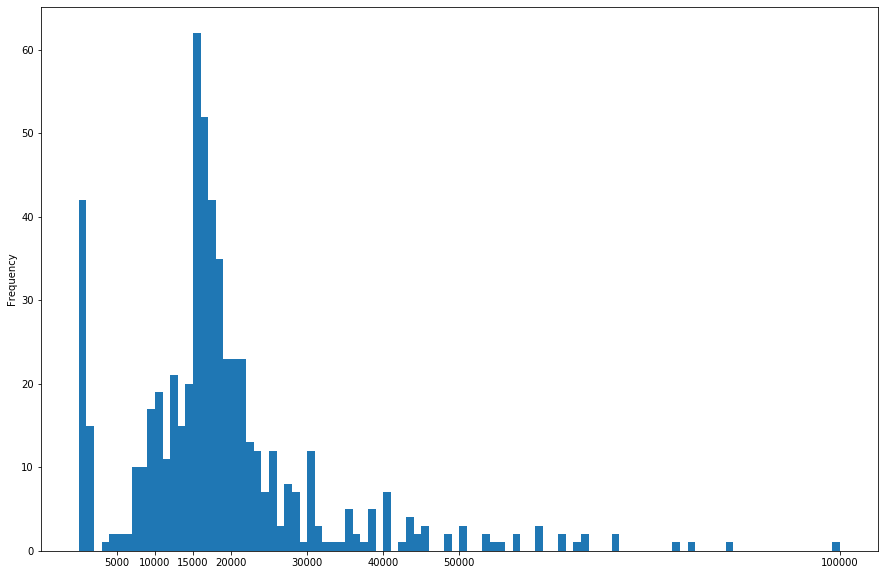

In [12]:
data_translated.NetSalary.plot.hist(figsize=(15,10), bins=100, xticks=[5000,10000,15000,20000,30000,40000,50000,100000])

A quick look on values between 2000 and 7000.

In [13]:
data_translated.loc[(data_translated.NetSalary > 2000) & (data_translated.NetSalary < 7000), ['YearsExperience', 'CityLive', 'CityWork', 'NetSalary']]

,YearsExperience,CityLive,CityWork,NetSalary
2,1-3,Athena,Athena,5460.0
38,6-10,London,London,4000.0
40,1-3,Thessaloniki,Thessaloniki,6000.0
64,I'm not working yet,Athena,Athena,6500.0
76,6-10,Patras,Patras,5000.0
194,6-10,Athena,Athena,3200.0
364,I'm not working yet,Thessaloniki,Thessaloniki,4500.0


This time the histogram includes only `NetSalary` values less than 10000. 

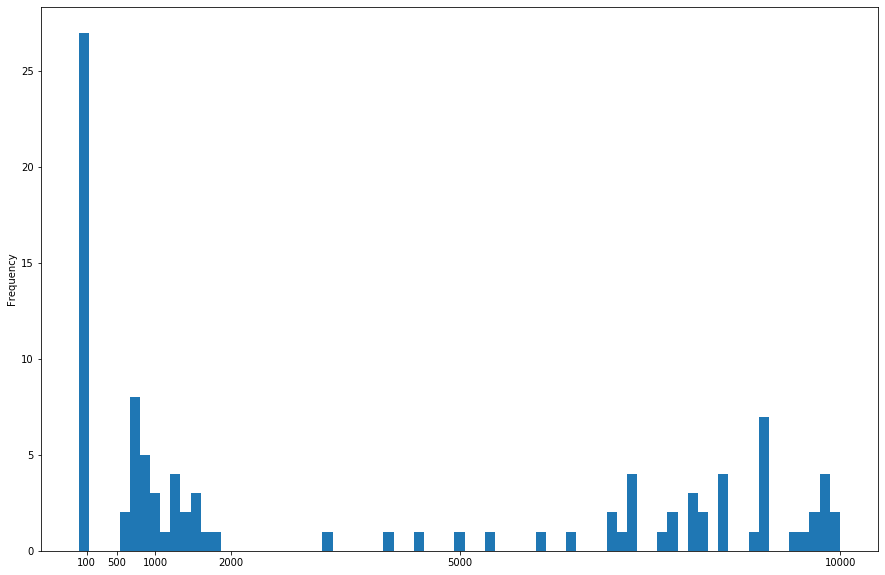

In [14]:
data_translated.NetSalary[data_translated.NetSalary < 10000].plot.hist(figsize=(15,10), bins=75, xticks=[100, 500, 1000, 2000, 5000,10000])

The final change performed on the `NetSalary` column is to curate the low values. It is assumed that any values equal or lower than 104 represent thousands of EUR currency. Any values from 105 up until 4000 refer to monthly net salaries. Therefore, the `NetSalary` values were curated according to the following function. Finally, any rows including zero are removed from the DataFrame.

In [15]:
def fix_net_salary(salary):
    if salary <= 104:
        return salary * 1000
    elif salary <= 4000:
        return salary * 14
    else:
        return salary
    
data_translated.NetSalary = data_translated.NetSalary.apply(fix_net_salary)

data_translated = data_translated[data_translated.NetSalary != 0]

This is the final histogram of the `NetSalary` column values.

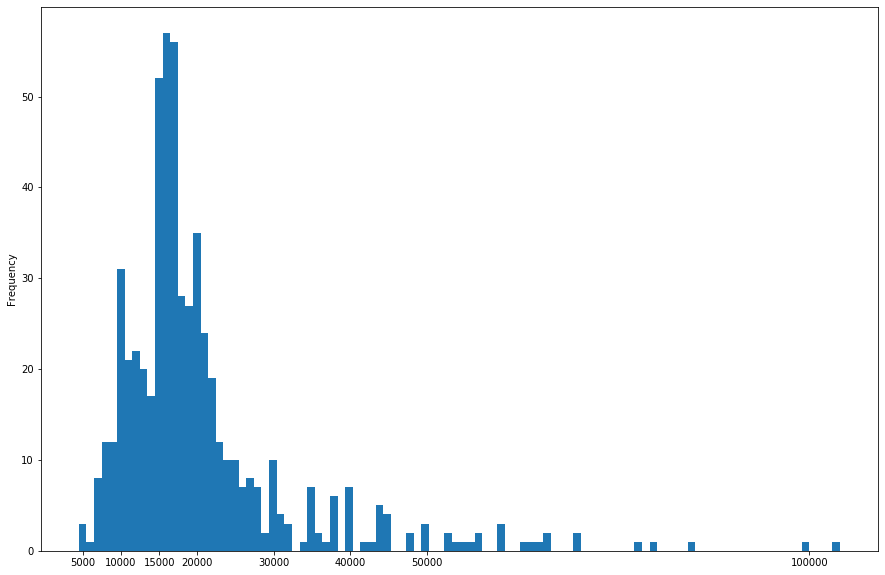

In [16]:
data_translated.NetSalary.plot.hist(figsize=(15,10), bins=100, xticks=[5000,10000,15000,20000,30000,40000,50000,100000])

## `DevelopmentType` & `ProgrammingLanguages` columns

The second step is to curate the `DevelopmentType` and `ProgrammingLanguages` columns. Both columns include strings of comma separated values relevant to various software topics and programming languages.

In [17]:
data_translated.head()

,TimeStamp,YearsExperience,DevelopmentType,ProgrammingLanguages,CompanySize,WorkLocation,SuperivisionRole,WorkOutsideMainJob,CityLive,CityWork,Sex,NetSalary
0,7/15/2020 12:03:11,4-5,"DevOps, Backend, Frontend","C#, JavaScript",11-50,Both,No,Yes,Athena,Athena,Man,18200.0
1,7/15/2020 12:03:58,1-3,"Backend, Frontend","C#, JavaScript",11-50,At the employer,No,No,Drama,Kavala,Man,13100.0
2,7/15/2020 12:05:43,1-3,Full Stack Web Developer,"C#, JavaScript, PHP",11-50,Both,No,No,Athena,Athena,Man,5460.0
3,7/15/2020 12:11:37,11+,Backend,"Java, C#",11-50,Both,Yes,No,PIRAEUS,PIRAEUS,Man,43500.0
4,7/15/2020 12:12:45,1-3,Frontend,JavaScript,11-50,Both,No,No,Athena,Athena,Man,16800.0


A helper function is defined that creates a dictionary of unique tags found in those columns. Then the dictionaries are curated manually.

In [18]:
def create_dictionary(column):
    unique_description_list = column.str.lower().unique().tolist()
    unique_values = set()
    for description in unique_description_list:
        values = [value.strip() for value in description.split(',')]
        unique_values.update(values)
    dictionary = {}
    for value in unique_values:
        dictionary[value] = value
    return dictionary

Dictionary for `DevelopmentType`.

In [19]:
development_type_dictionary = create_dictionary(data_translated['DevelopmentType'])

print(development_type_dictionary)

{'databases': 'databases', 'desktop apps': 'desktop apps', 'devsecop': 'devsecop', 'finance/trading applications': 'finance/trading applications', 'gaming': 'gaming', 'security devop': 'security devop', 'data etls': 'data etls', 'mobile apps': 'mobile apps', 'frontend': 'frontend', 'ai / ml': 'ai / ml', 'drupal': 'drupal', 'rpa developer': 'rpa developer', 'websites': 'websites', 'cybersecurity': 'cybersecurity', 'automation testing': 'automation testing', 'embedded': 'embedded', 'embedded/low-level/systems programming': 'embedded/low-level/systems programming', 'bi': 'bi', 'full stack developer': 'full stack developer', 'mobile robotics': 'mobile robotics', 'backend': 'backend', '+ project managment': '+ project managment', 'business intelligence': 'business intelligence', 'fullstack': 'fullstack', 'full stack web developer': 'full stack web developer', 'magento': 'magento', 'ict': 'ict', 'ui/ux': 'ui/ux', 'devops': 'devops', 'penetration testing': 'penetration testing'}


In [20]:
development_type_dictionary['full stack developer'] = 'fullstack'
development_type_dictionary['full stack web developer'] = 'fullstack'
development_type_dictionary['finance/trading applications'] = 'fullstack'
development_type_dictionary['desktop apps'] = 'desktop'
development_type_dictionary['cybersecurity'] = 'security'
development_type_dictionary['security devop'] = 'security'
development_type_dictionary['penetration testing'] = 'security'
development_type_dictionary['devsecop'] = 'security'
development_type_dictionary['security devop'] = 'security'
development_type_dictionary['business intelligence'] = 'bi'
development_type_dictionary['mobile apps'] = 'mobile'
development_type_dictionary['automation testing'] = 'qa'
development_type_dictionary['websites'] = 'frontend'
development_type_dictionary['data etls'] = 'data'
development_type_dictionary['databases'] = 'data'
development_type_dictionary['+ project managment'] = 'pm'
development_type_dictionary['embedded/low-level/systems programming'] = 'embedded'
development_type_dictionary['mobile robotics'] = 'robotics'
development_type_dictionary['rpa developer'] = 'robotics'

print(development_type_dictionary)

{'databases': 'data', 'desktop apps': 'desktop', 'devsecop': 'security', 'finance/trading applications': 'fullstack', 'gaming': 'gaming', 'security devop': 'security', 'data etls': 'data', 'mobile apps': 'mobile', 'frontend': 'frontend', 'ai / ml': 'ai / ml', 'drupal': 'drupal', 'rpa developer': 'robotics', 'websites': 'frontend', 'cybersecurity': 'security', 'automation testing': 'qa', 'embedded': 'embedded', 'embedded/low-level/systems programming': 'embedded', 'bi': 'bi', 'full stack developer': 'fullstack', 'mobile robotics': 'robotics', 'backend': 'backend', '+ project managment': 'pm', 'business intelligence': 'bi', 'fullstack': 'fullstack', 'full stack web developer': 'fullstack', 'magento': 'magento', 'ict': 'ict', 'ui/ux': 'ui/ux', 'devops': 'devops', 'penetration testing': 'security'}


Dictionary for `ProgrammingLanguages`.

In [21]:
program_lang_dictionary = create_dictionary(data_translated['ProgrammingLanguages'])

print(program_lang_dictionary)

{'rdml': 'rdml', 'css': 'css', 'javascript': 'javascript', 'elixir': 'elixir', 'node.js': 'node.js', 'clojure': 'clojure', 'pl/sql': 'pl/sql', 'ca gen': 'ca gen', 'c++': 'c++', 'html css js': 'html css js', 'cobol': 'cobol', 'dynamics nav': 'dynamics nav', 'html css wordpress': 'html css wordpress', 'c#': 'c#', 'angular': 'angular', 'tcl': 'tcl', 'r': 'r', 'groovy': 'groovy', 'php': 'php', 'salesforce apex (java)': 'salesforce apex (java)', 'go': 'go', 'bash': 'bash', 'delphi / object pascal': 'delphi / object pascal', 'kotlin': 'kotlin', 'python': 'python', 'vuejs': 'vuejs', 'scala': 'scala', 'assembly': 'assembly', 'c': 'c', 'swift': 'swift', 'perl': 'perl', 'typescript': 'typescript', 'visual basic': 'visual basic', 'avaloq': 'avaloq', 'apex': 'apex', 'html': 'html', 'visual basic .net': 'visual basic .net', 'rust': 'rust', 'java': 'java', 'objective-c': 'objective-c', 'node js': 'node js', 'ruby': 'ruby'}


In [22]:
program_lang_dictionary['pl/sql'] = 'sql'
program_lang_dictionary['visual basic .net'] = 'vb'
program_lang_dictionary['javascript'] = 'js'
program_lang_dictionary['avaloq'] = 'sql'
program_lang_dictionary['salesforce apex (java)'] = 'apex'
program_lang_dictionary['node.js'] = 'node'
program_lang_dictionary['html css wordpress'] = 'wordpress'
program_lang_dictionary['vuejs'] = 'vue'
program_lang_dictionary['node js'] = 'node'
program_lang_dictionary['visual basic'] = 'vb'
program_lang_dictionary['html css js'] = 'js'
program_lang_dictionary['delphi / object pascal'] = 'delphi'

print(program_lang_dictionary)

{'rdml': 'rdml', 'css': 'css', 'javascript': 'js', 'elixir': 'elixir', 'node.js': 'node', 'clojure': 'clojure', 'pl/sql': 'sql', 'ca gen': 'ca gen', 'c++': 'c++', 'html css js': 'js', 'cobol': 'cobol', 'dynamics nav': 'dynamics nav', 'html css wordpress': 'wordpress', 'c#': 'c#', 'angular': 'angular', 'tcl': 'tcl', 'r': 'r', 'groovy': 'groovy', 'php': 'php', 'salesforce apex (java)': 'apex', 'go': 'go', 'bash': 'bash', 'delphi / object pascal': 'delphi', 'kotlin': 'kotlin', 'python': 'python', 'vuejs': 'vue', 'scala': 'scala', 'assembly': 'assembly', 'c': 'c', 'swift': 'swift', 'perl': 'perl', 'typescript': 'typescript', 'visual basic': 'vb', 'avaloq': 'sql', 'apex': 'apex', 'html': 'html', 'visual basic .net': 'vb', 'rust': 'rust', 'java': 'java', 'objective-c': 'objective-c', 'node js': 'node', 'ruby': 'ruby'}


Then helper functions are defined that assist in the creation of dummy variables (columns) for each unique tag found in the previous steps. The value of that variable is either 1 or 0, denoting the existence or absense of that tag, originally mentioned in the `DevelopmentType` or `ProgrammingLanguages` columns.

In [23]:
def fix_description(description, dictionary):
    fixed_description = [dictionary.get(value.strip()) for value in description.split(',')]
    return fixed_description

In [24]:
def create_dummy_variables(df, column_name, development_type_dictionary):
    
    development_type_dictionary = {k: v for k, v in sorted(development_type_dictionary.items(), key=lambda item: item[1])}
    
    temp_column = df[column_name].str.lower().apply(lambda x: fix_description(x, development_type_dictionary))

    for value in list(development_type_dictionary.values()):
        df[value] = temp_column.apply(lambda x: 1. if value in x else 0.)

In [25]:
create_dummy_variables(data_translated, 'DevelopmentType', development_type_dictionary)
create_dummy_variables(data_translated, 'ProgrammingLanguages', program_lang_dictionary)

## `CityLive` & `CityWork` columns

The third step is to curate the `CityLive` and `CityWork` columns. The available values for both columns are checked.

In [26]:
data_translated['CityLive'] = data_translated['CityLive'].str.title()
data_translated['CityWork'] = data_translated['CityWork'].str.title()

unique_cities = data_translated['CityLive'].append(data_translated['CityWork']).unique()
print(unique_cities)

['Athena' 'Drama' 'Piraeus' 'Heraklion' 'Thessaloniki' 'Rethimno' 'Krakow'
 'Limassol' 'Amsterdam' 'Chania' 'Serres' 'London' 'Kozani' 'Leeds'
 'Patras' 'Nuremberg' 'Glasgow' 'Berlin' 'Vienna' 'Salamis' 'Madrid'
 'Kavala' 'Kalymnos' 'Komotini' 'Eindhoven' 'Cyprus' 'Oxford' 'Volos'
 'Kalmar' 'Xanthi' 'Janina' 'Bratislava' 'Cologne' 'Larissa' '-' 'Chios'
 'Karlskrona' 'Malmö - Sweden' 'Munich' 'Stockholm' 'Tripoli' 'Lisbon'
 'Stuttgart' 'Aigio' 'Dublin/California ' 'I Do Not Have A Specific City'
 nan 'Leeds, Uk' 'San Francisco' 'Nicosia' 'Larnaca' 'Zurich' 'Miami'
 'Cambridge']


After finding out all unique values of those columns, a correction dictionary is created for the curation of any values.

In [27]:
cities_dictionary = {}
cities_dictionary['-'] = None
cities_dictionary['Malmö - Sweden'] = 'Malmö'
cities_dictionary['Dublin/California '] = 'California'
cities_dictionary['I Do Not Have A Specific City'] = None
cities_dictionary['Leeds, Uk'] = 'Leeds'

data_translated['CityLive'] = data_translated['CityLive'].replace(cities_dictionary).astype('category')
data_translated['CityWork'] = data_translated['CityWork'].replace(cities_dictionary).astype('category')

## `SuperivisionRole` & `WorkOutsideMainJob` columns

The last step is to curate the `SuperivisionRole` and `WorkOutsideMainJob` columns by converting the Yes/No textual values to 1/0 numeric values.

In [28]:
data_translated['SuperivisionRole'] = data_translated['SuperivisionRole'].replace({'No': 0., 'Yes': 1.})
data_translated['WorkOutsideMainJob'] = data_translated['WorkOutsideMainJob'].replace({'No': 0., 'Yes': 1.})

In [29]:
data_translated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 584
Data columns (total 68 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   TimeStamp             580 non-null    object  
 1   YearsExperience       580 non-null    object  
 2   DevelopmentType       580 non-null    object  
 3   ProgrammingLanguages  580 non-null    object  
 4   CompanySize           580 non-null    object  
 5   WorkLocation          580 non-null    object  
 6   SuperivisionRole      580 non-null    float64 
 7   WorkOutsideMainJob    574 non-null    float64 
 8   CityLive              579 non-null    category
 9   CityWork              282 non-null    category
 10  Sex                   571 non-null    object  
 11  NetSalary             580 non-null    float64 
 12  ai / ml               580 non-null    float64 
 13  backend               580 non-null    float64 
 14  bi                    580 non-null    float64 
 15  data  

## Save Data

In [30]:
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

output_file = 'data_curated.csv'
data_translated.to_csv(os.path.join(data_dir, output_file), index=False)